* contents_ctr (색깔은 cluster 구분용)

* `evaluate` : `experiments`개의 mab를 각각 `iterations`번 씩 돌리고 iter별 regret 평균을 계산

* `draw_regret`의 `n_groups`
  > [0,iterations]를 n_groups개로 쪼갠 후 각 구간당 평균을 내서 plot

In [1]:
import numpy as np
from thompson_sampling import *
from evaluation import *

In [2]:
contents_ctr1 = [[0.1, 0.3, 0.3,0.1],
                [0.55, 0.9, 0.7],
                [0.8, 0.3, 0.4, 0.1]]

contents_ctr2 =[[0.9, 0.3, 0.8,0.1,],
                [0.55, 0.2, 0.7],
                [0.8, 0.3, 0.4, 0.9]]

contents_ctr3 =[[0.3, 0.2, 0.5,0.1,],
                [0.3, 0.2, 0.5],
                [0.8, 0.7, 0.8, 0.9]]

contents_ctr4 =[[0.9, 0.7, 0.8,0.1,],
                [0.55, 0.2, 0.5],
                [0.4, 0.3, 0.4, 0.3]]

contents_ctr5 =[[0.4, 0.5, 0.55, 0.3,0.1,0.2],
                [0.9, 0.2, 0.5,0.3,0.7,0.5,0.2,0.1],
                [0.1,0.1,0.6]]

contents_ctr6 = [[0.1, 0.3, 0.3,0.1],
                [0.7, 0.9, 0.65],
                [0.8, 0.3, 0.4, 0.1],
                [0.1, 0.3, 0.3,0.1],
                [0.1, 0.3, 0.3,0.1],
                [0.5, 0.3, 0.4, 0.1],
                [0.7, 0.9, 0.7],
                [0.5, 0.3, 0.4, 0.1]]

collection = [contents_ctr1, contents_ctr2, contents_ctr3,
              contents_ctr4, contents_ctr5, contents_ctr6]

100%|██████████| 10/10 [00:45<00:00,  4.55s/it]


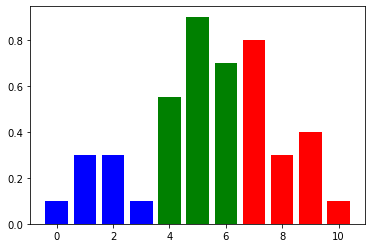

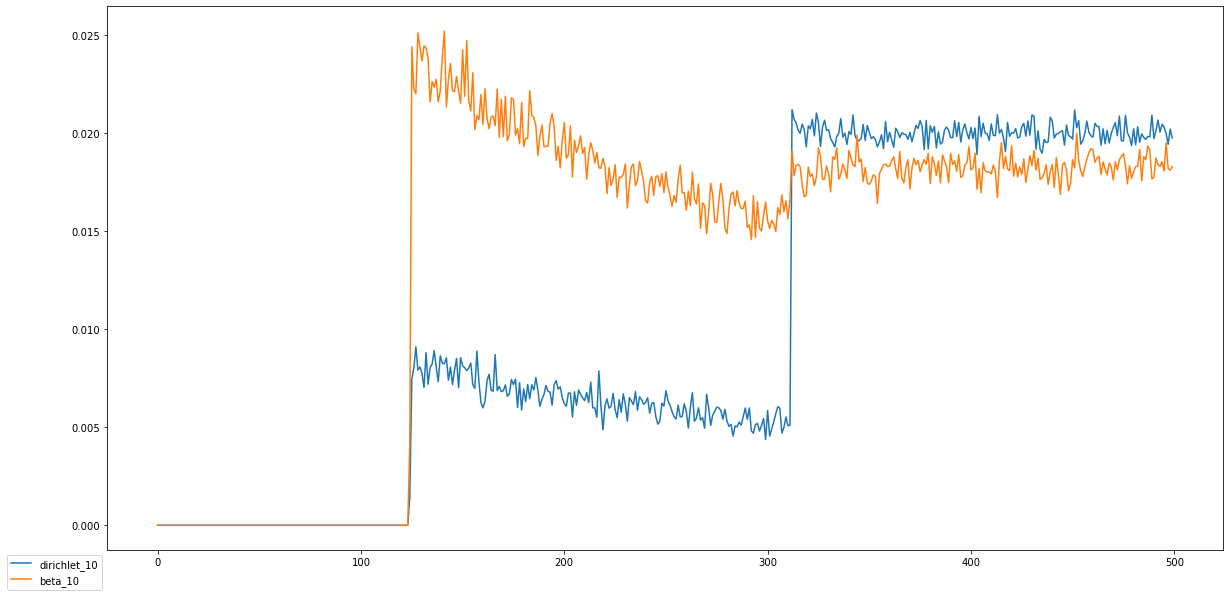

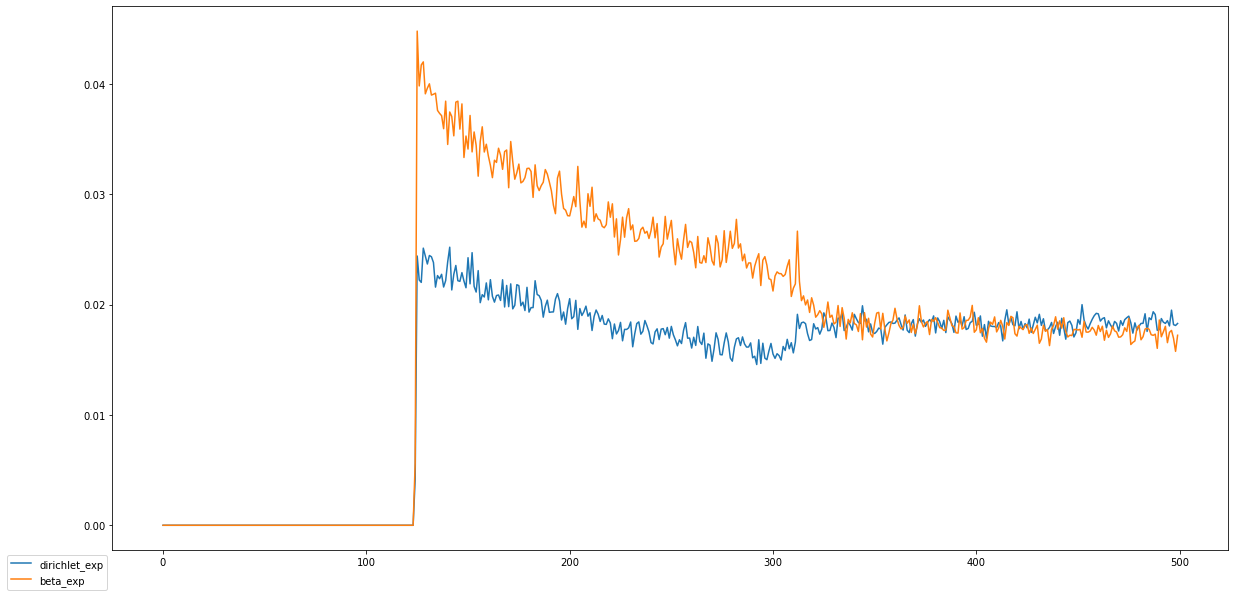

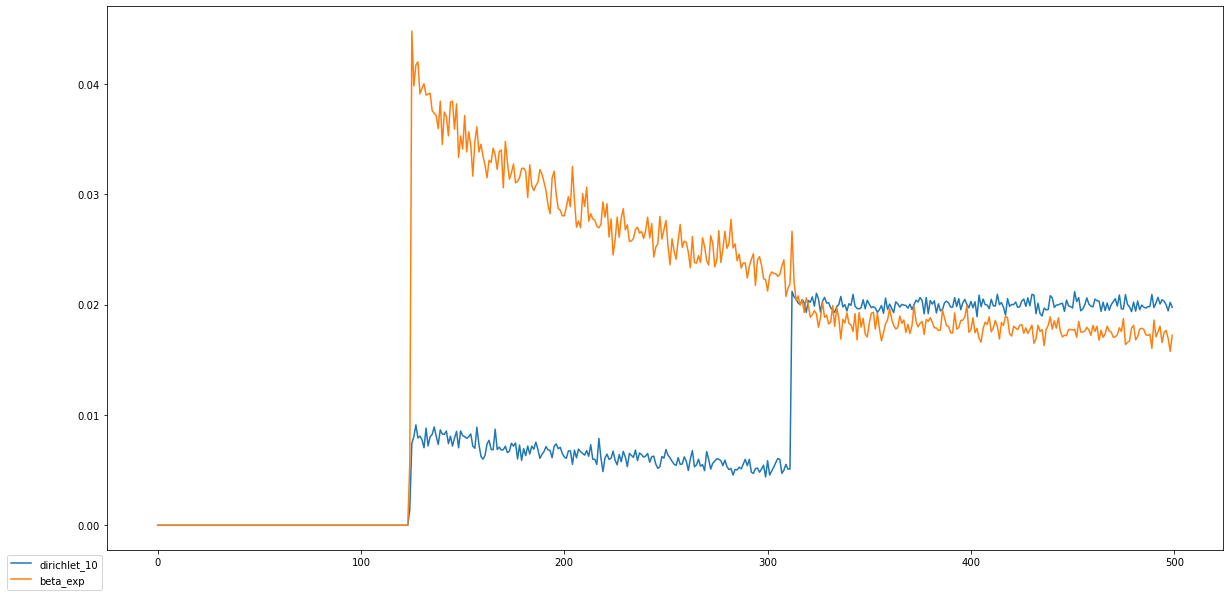

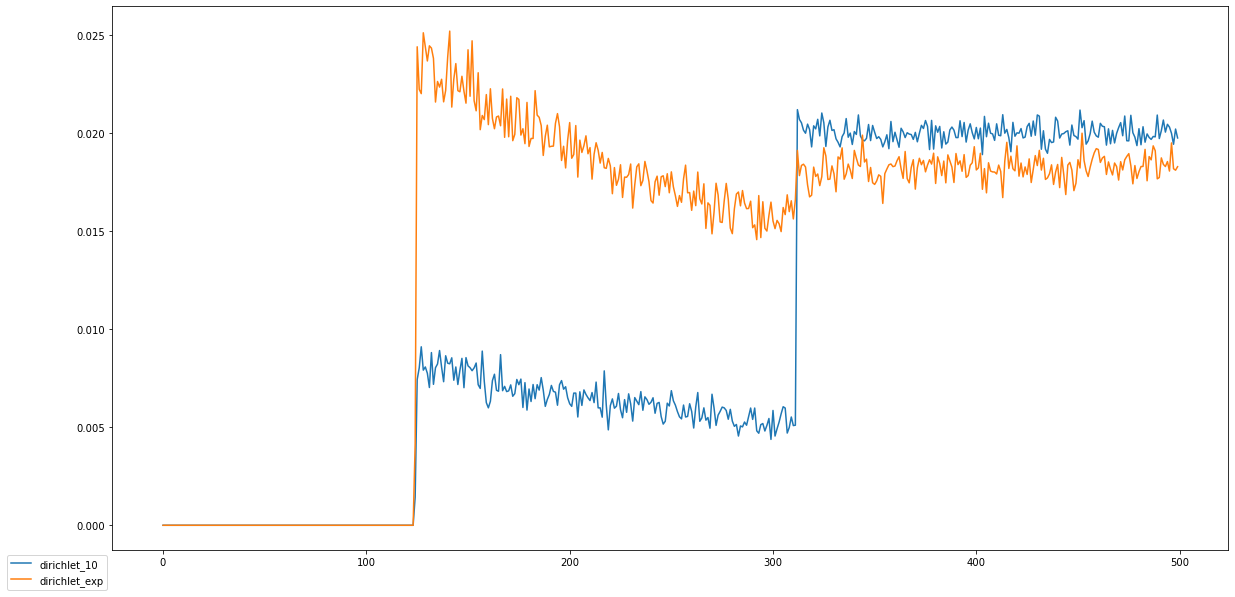

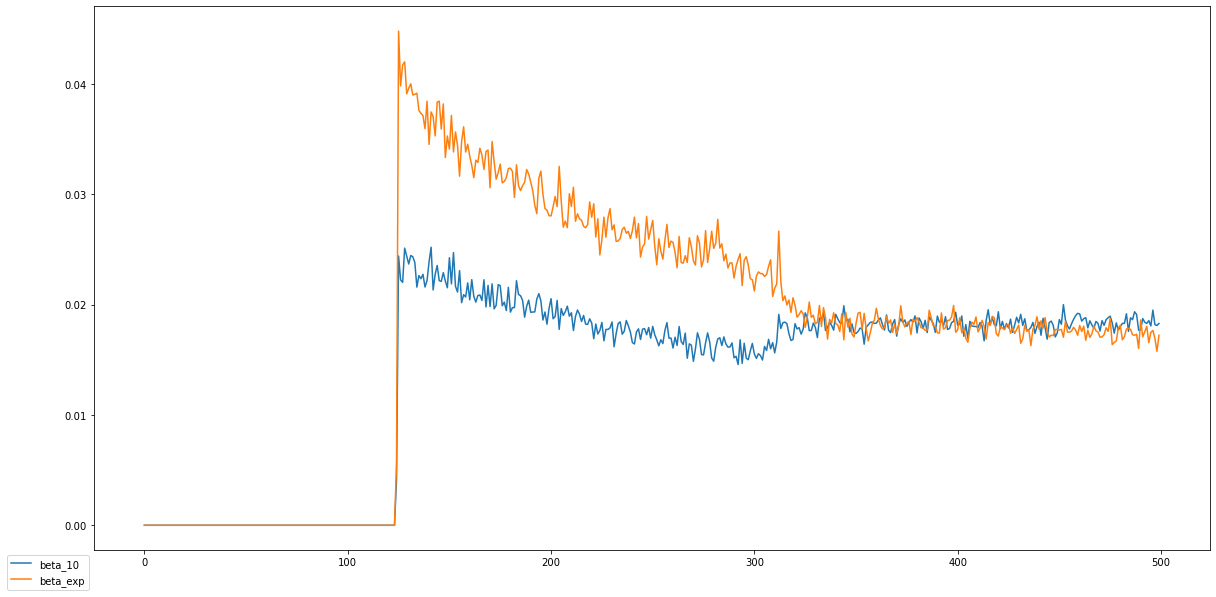

100%|██████████| 10/10 [00:38<00:00,  3.83s/it]


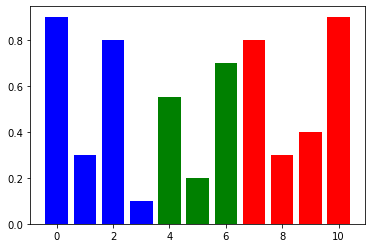

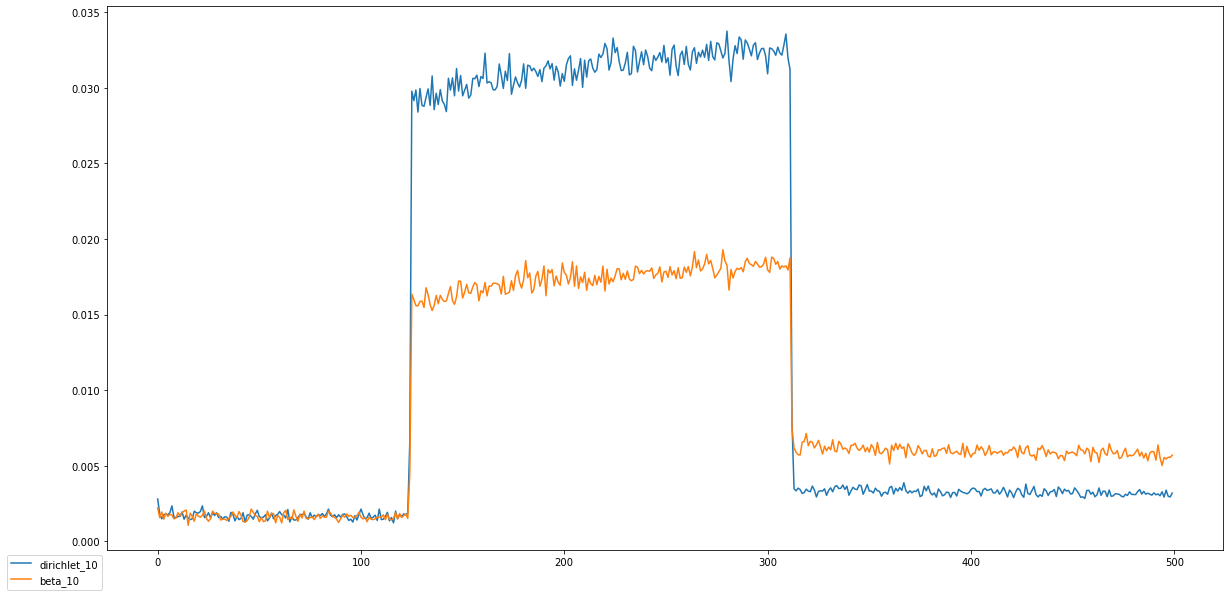

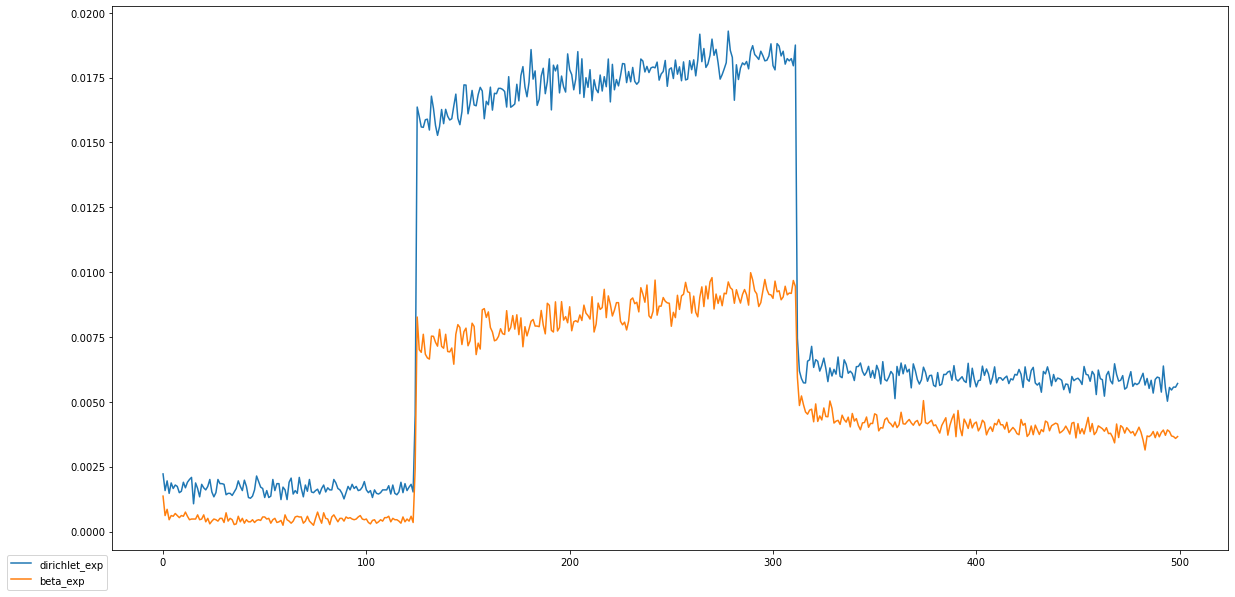

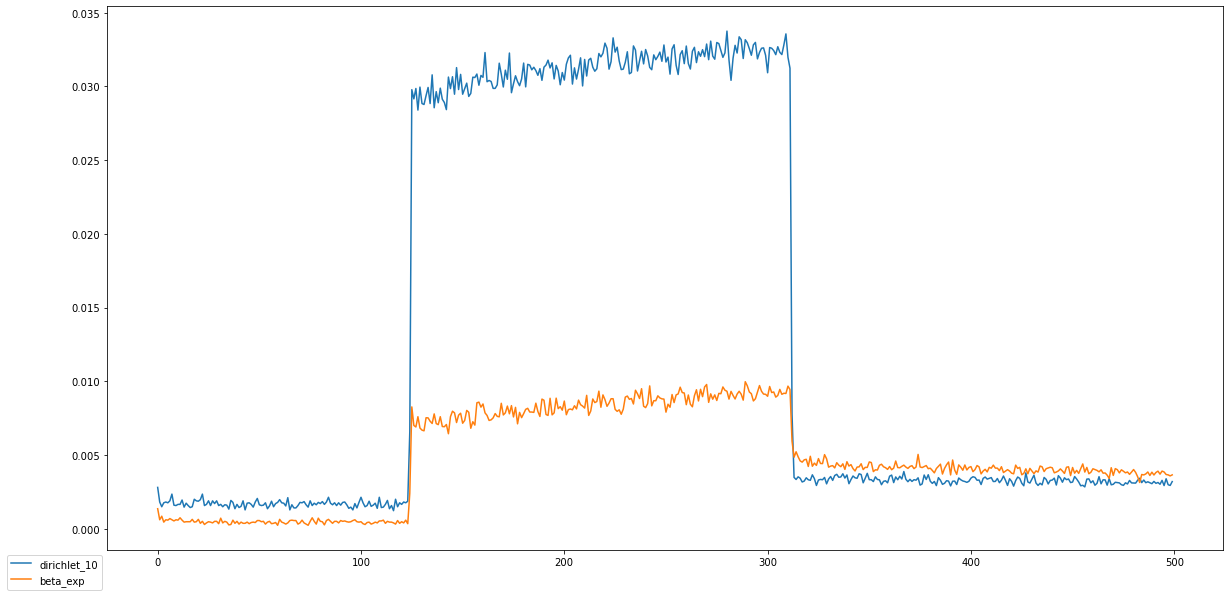

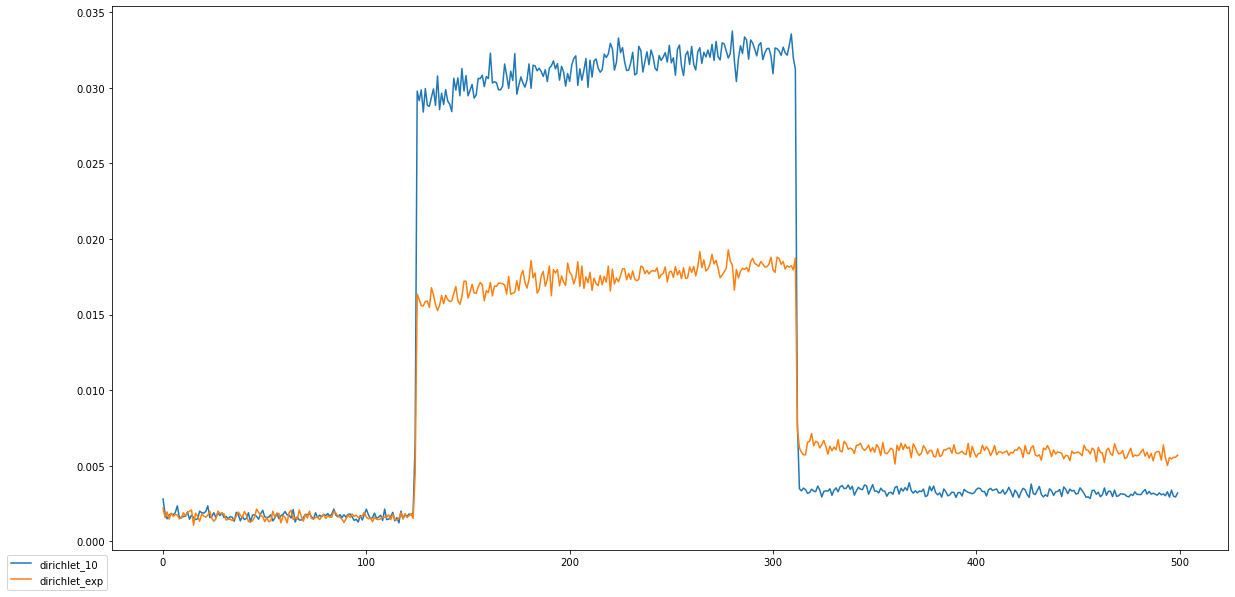

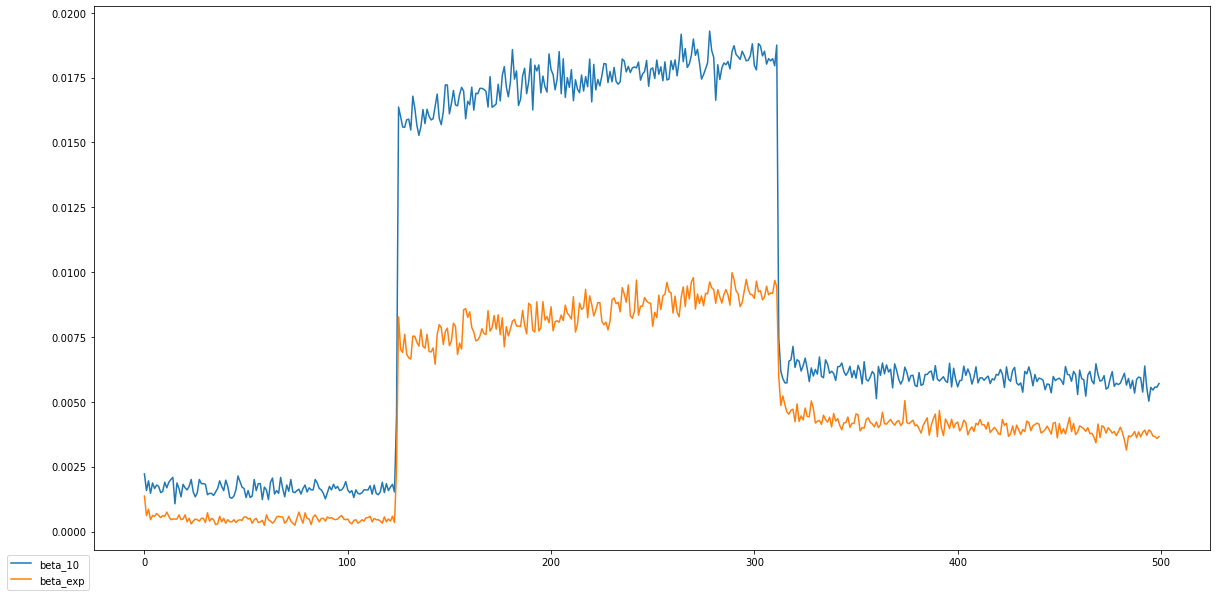

100%|██████████| 10/10 [00:50<00:00,  5.04s/it]


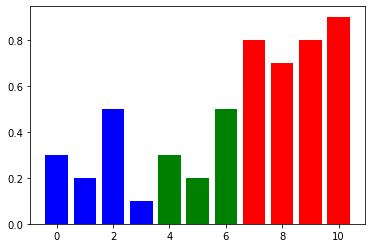

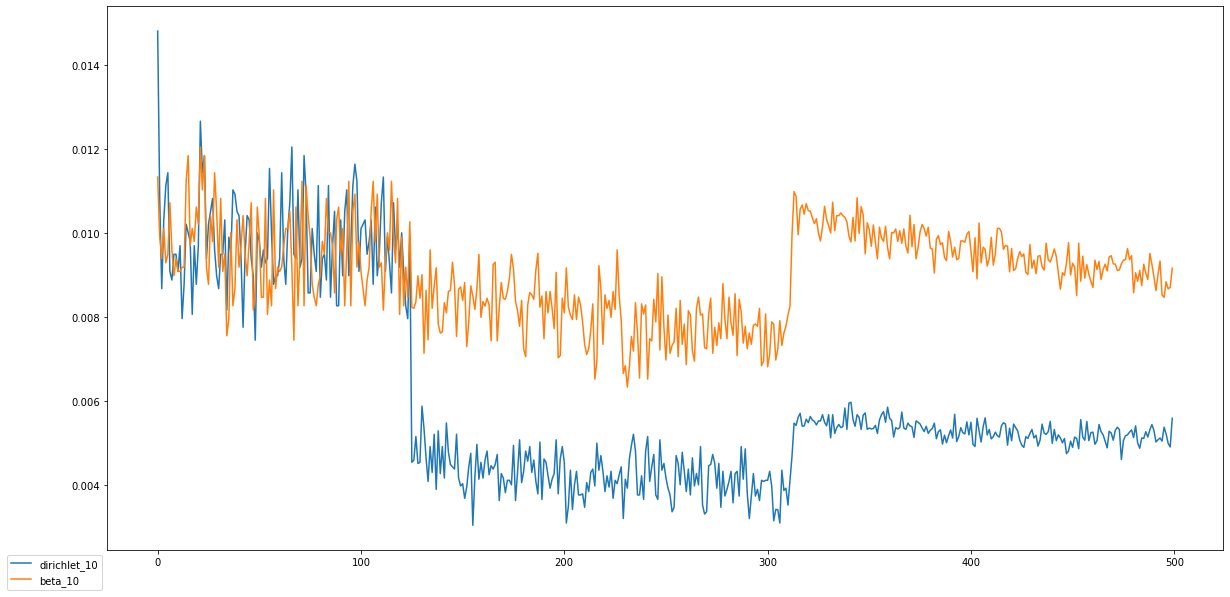

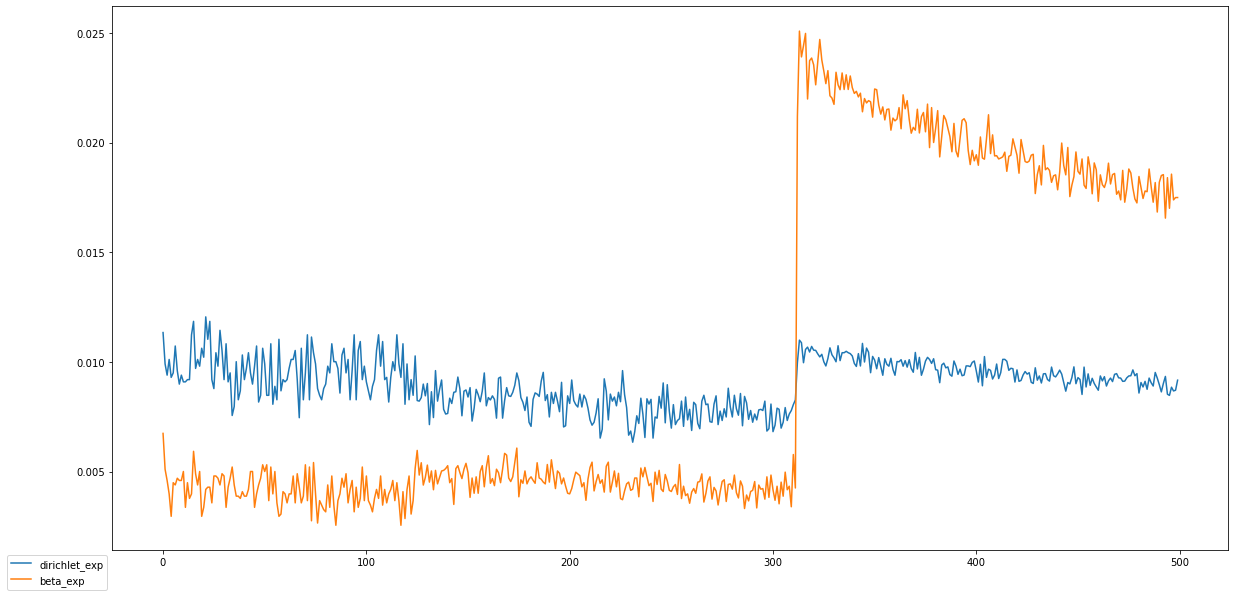

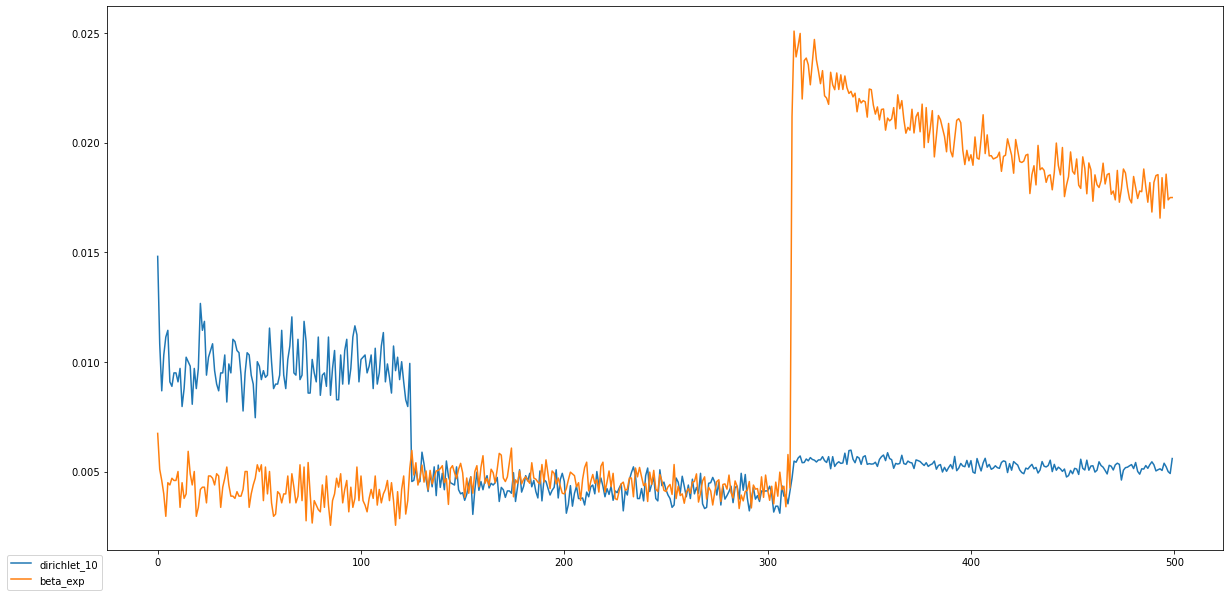

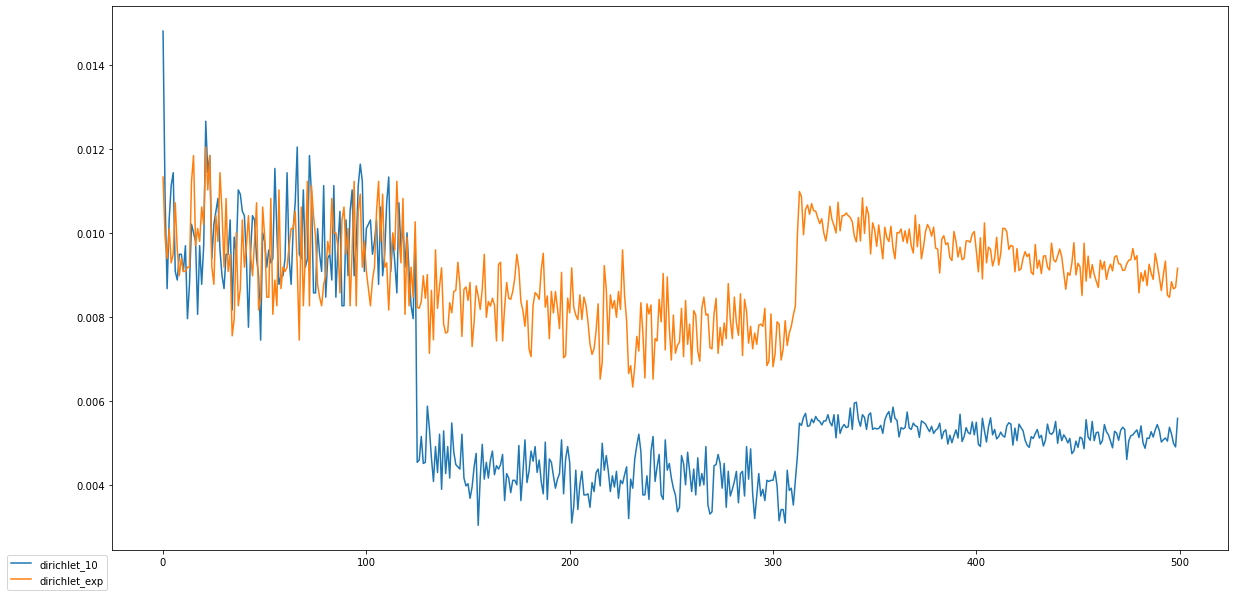

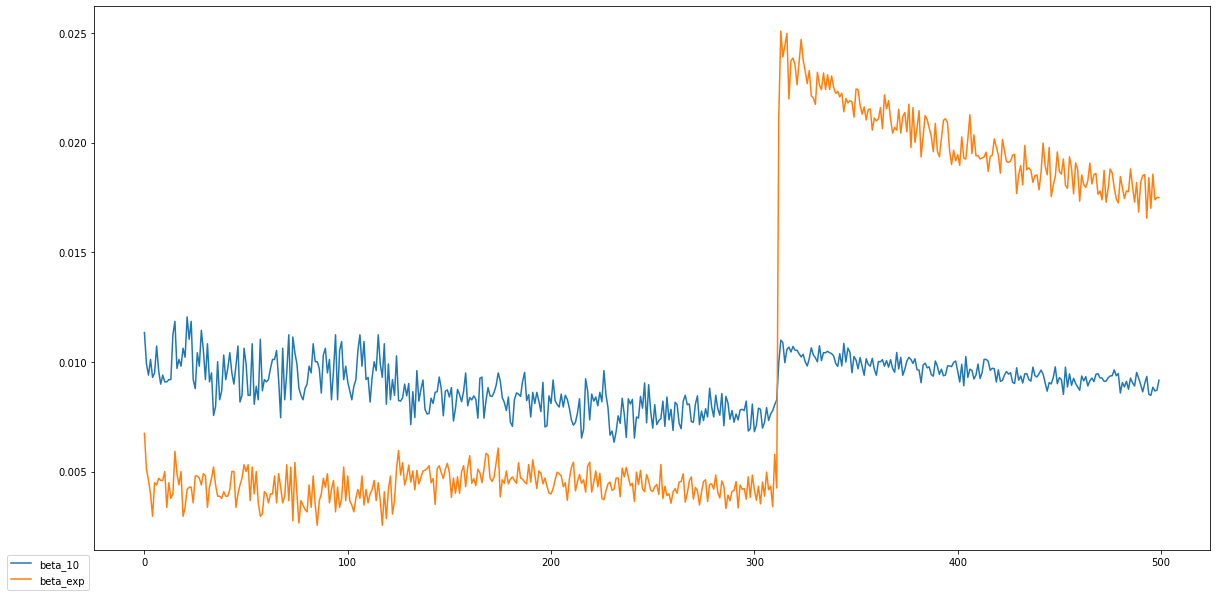

100%|██████████| 10/10 [00:50<00:00,  5.01s/it]


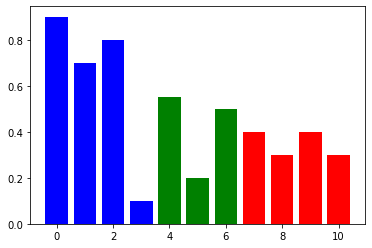

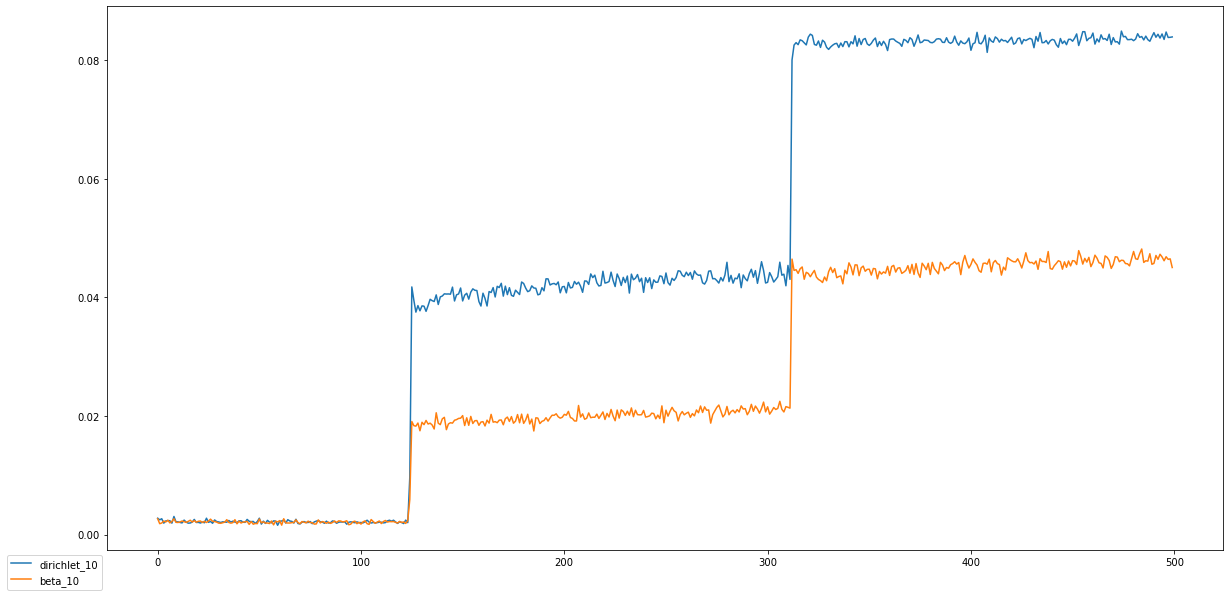

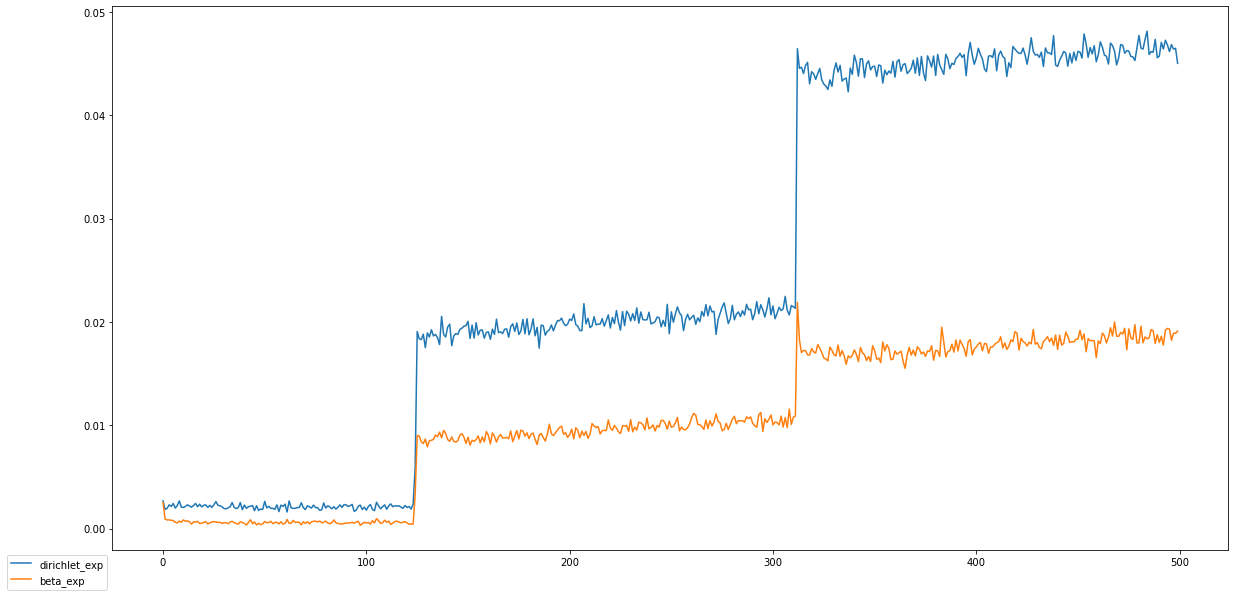

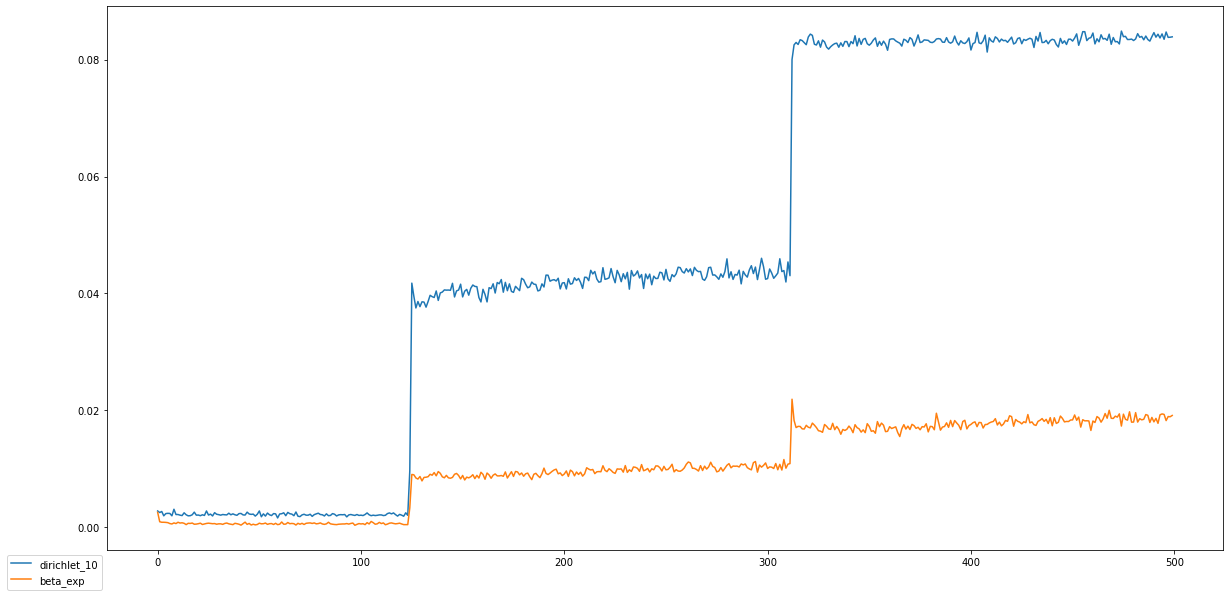

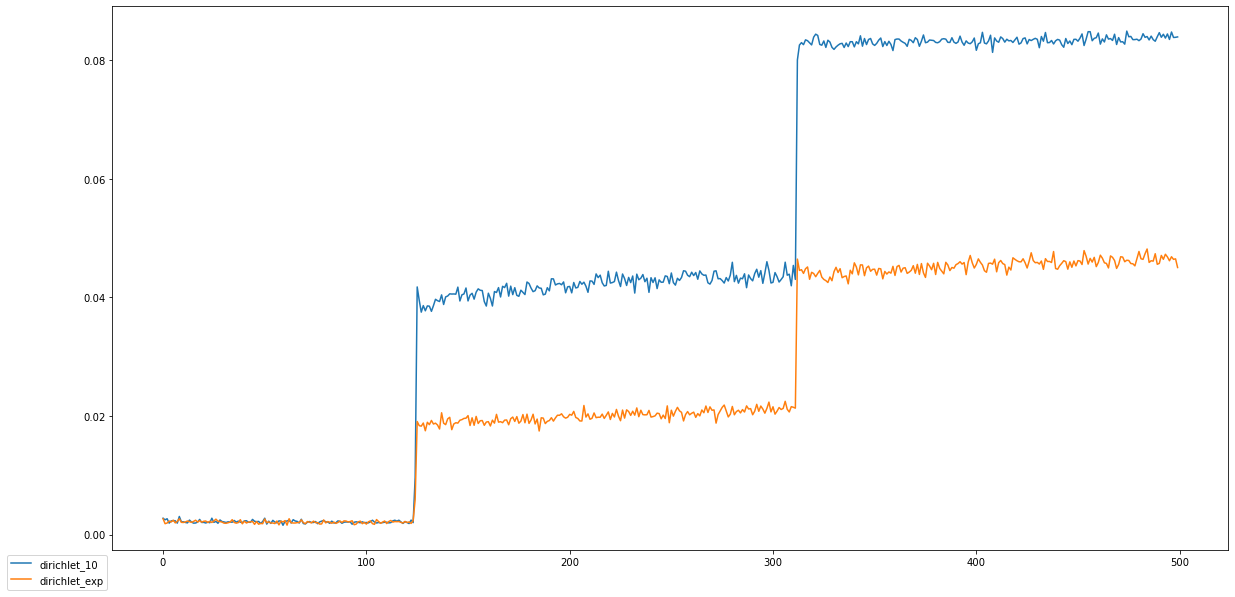

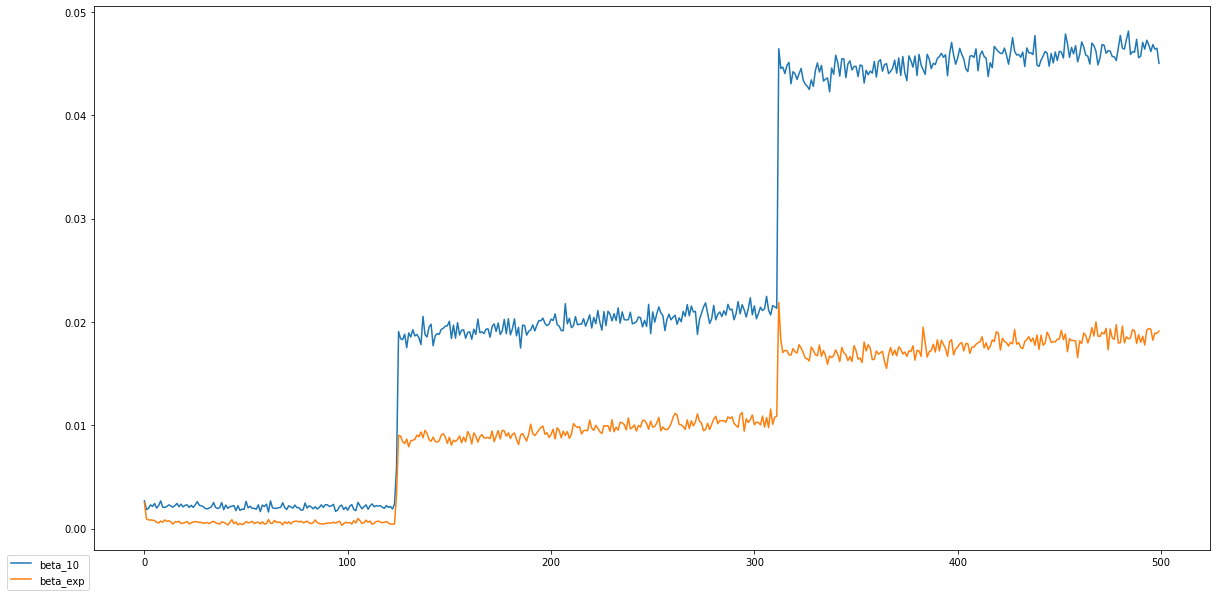

100%|██████████| 10/10 [00:52<00:00,  5.30s/it]


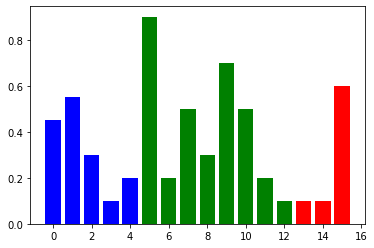

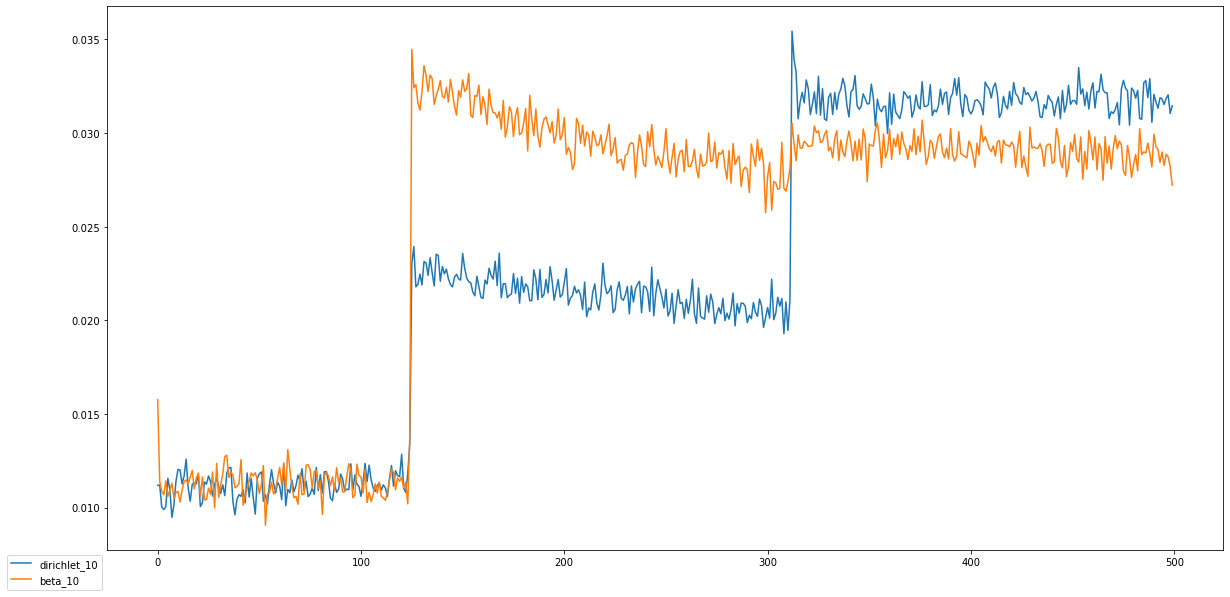

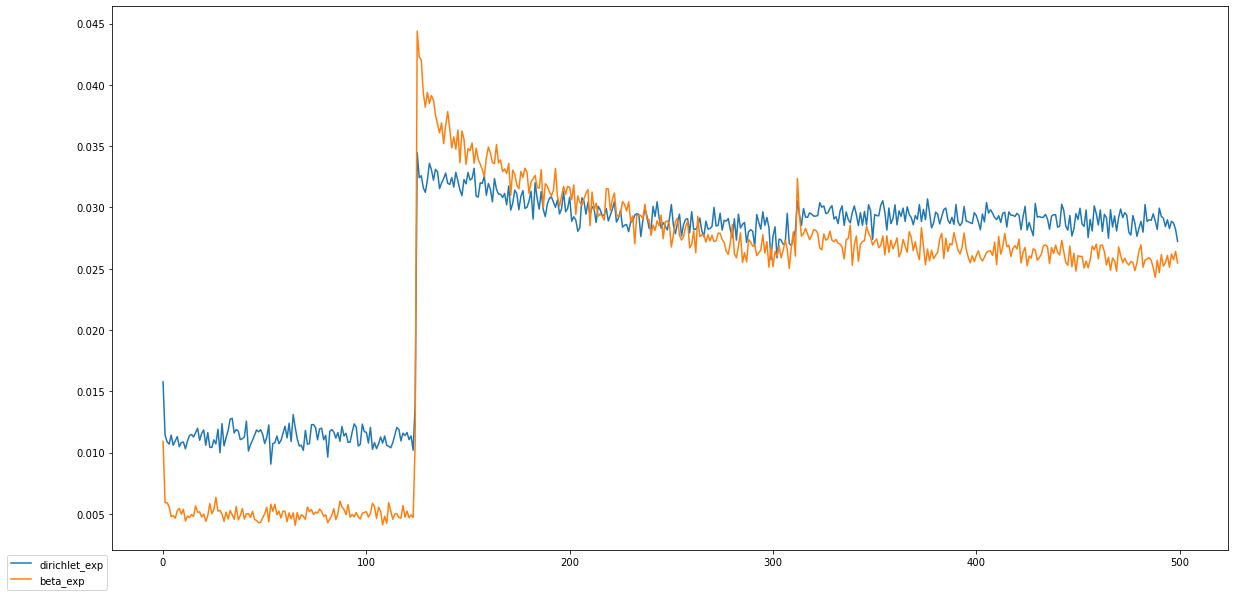

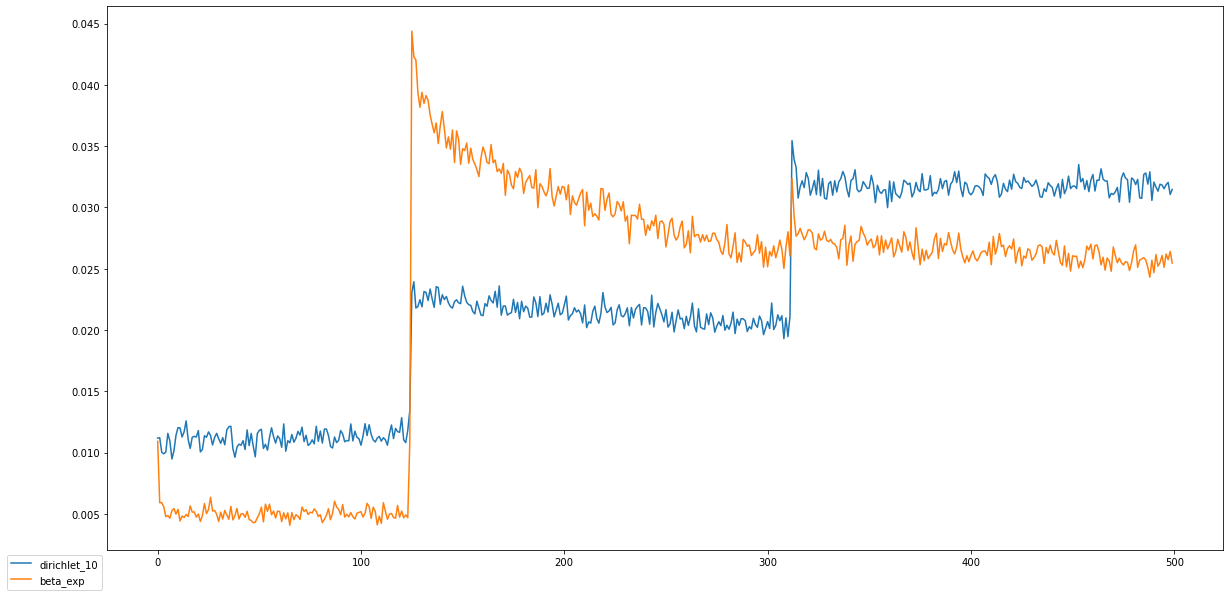

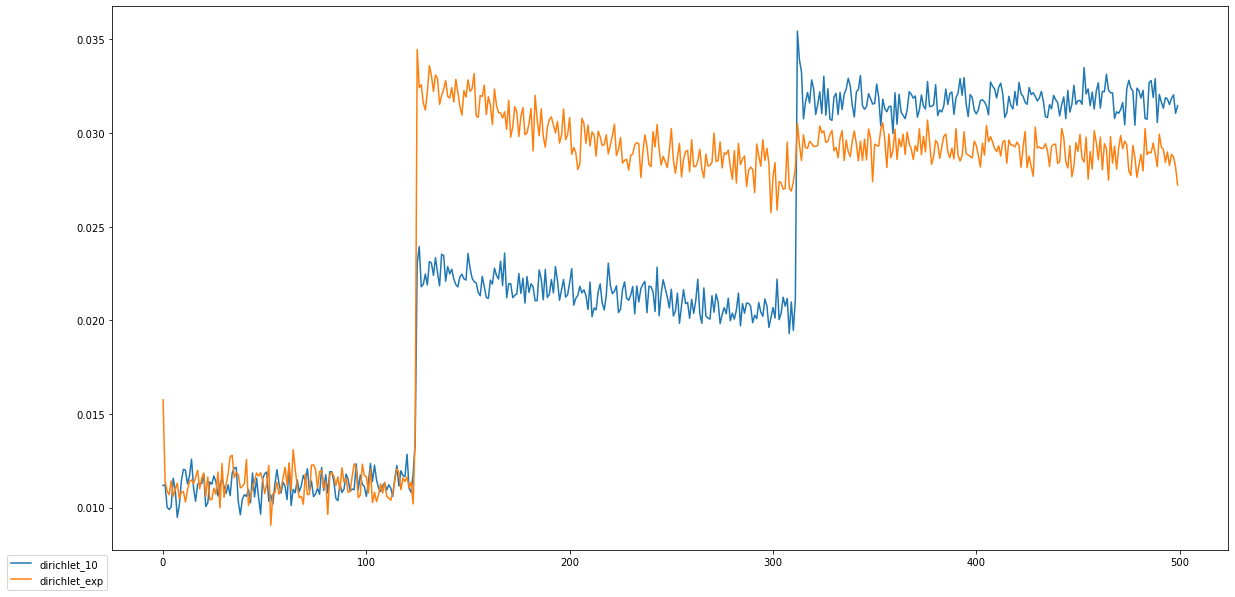

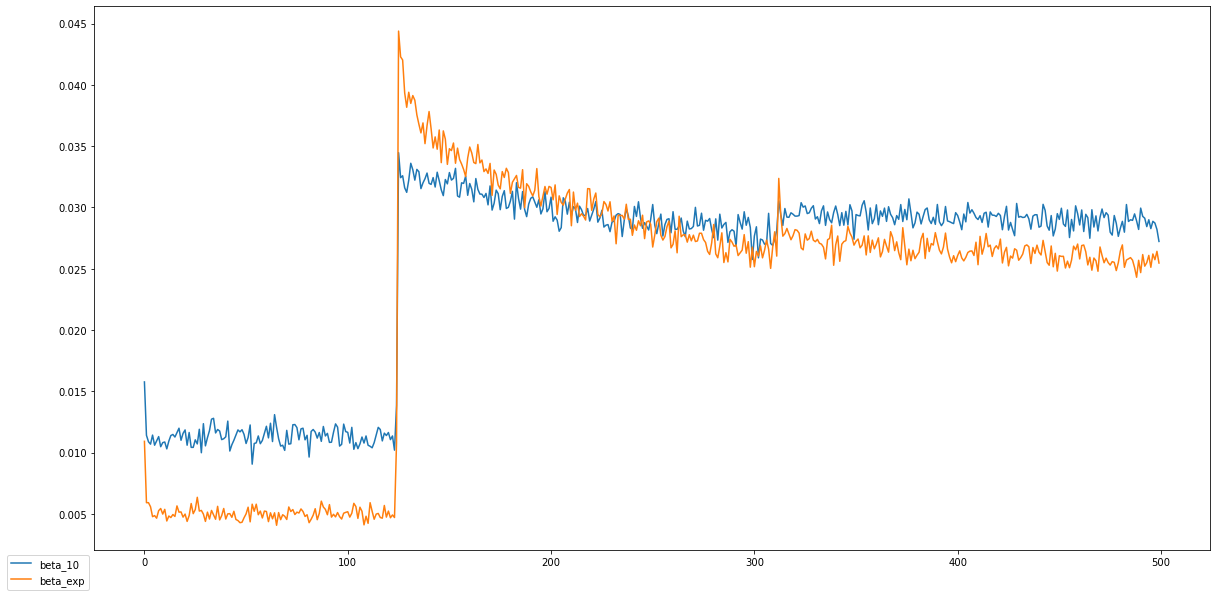

100%|██████████| 10/10 [01:03<00:00,  6.33s/it]


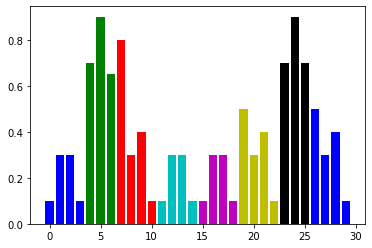

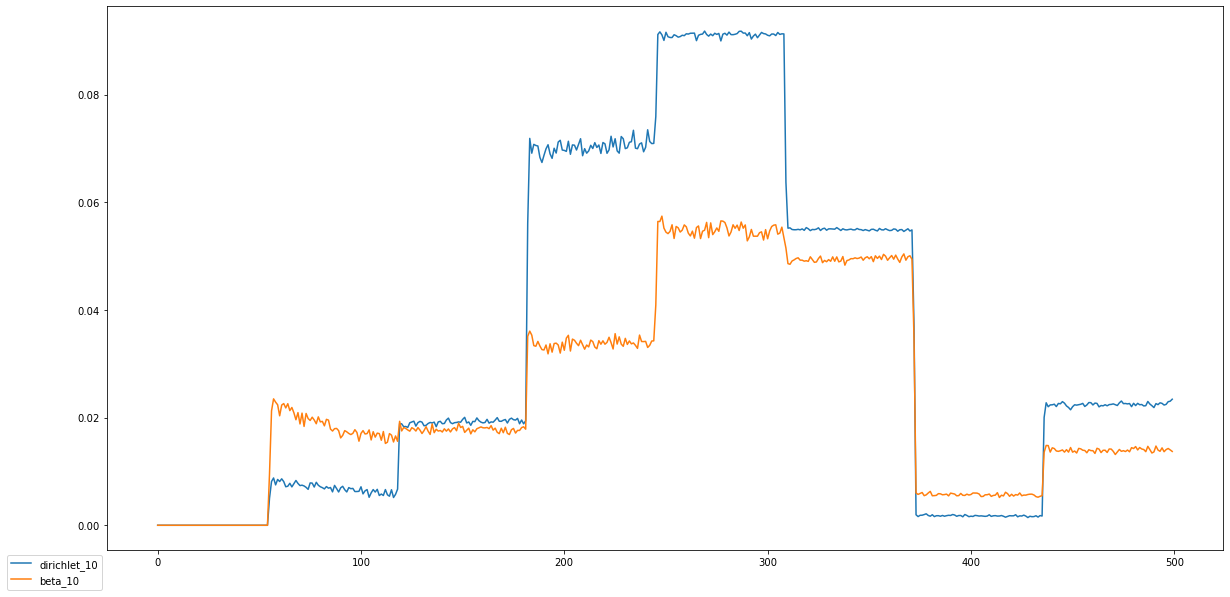

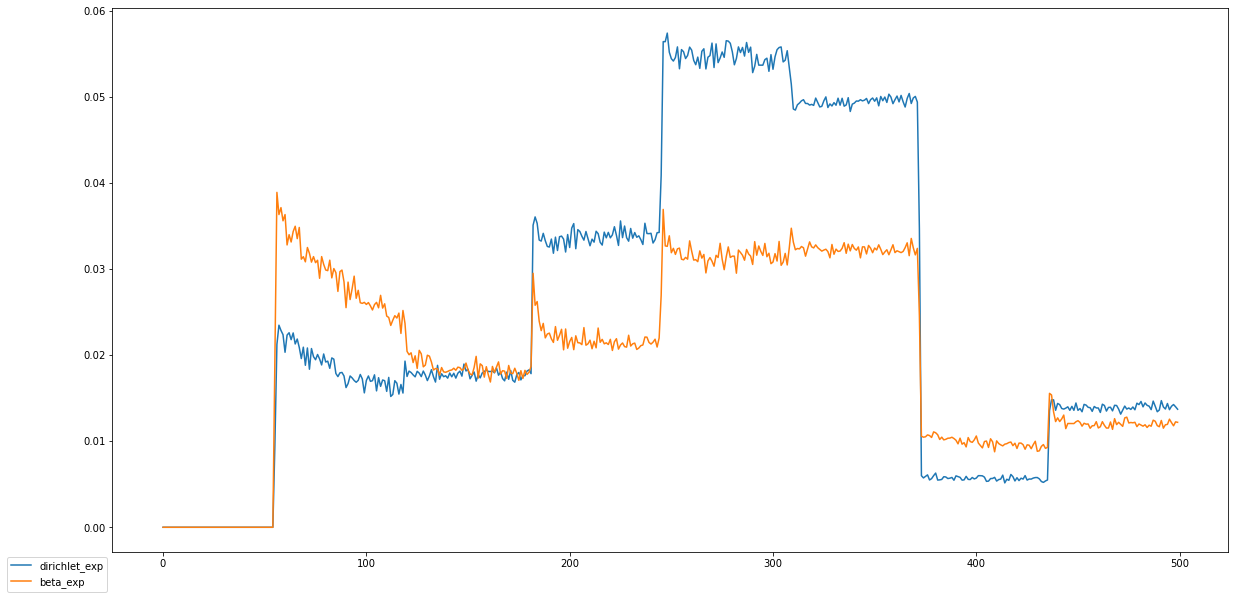

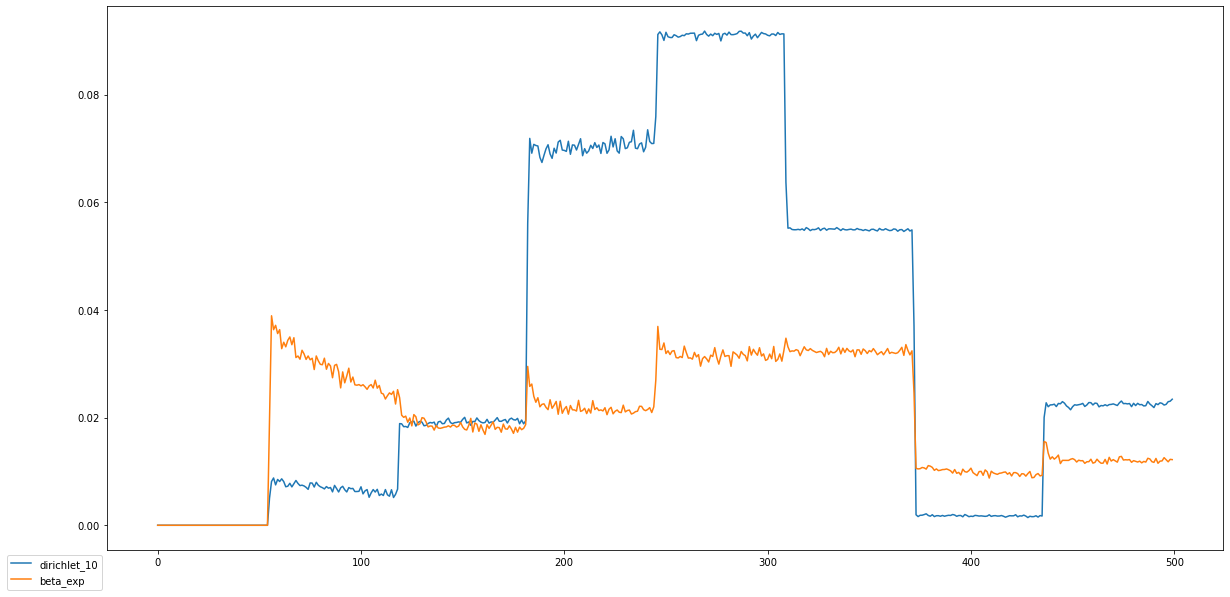

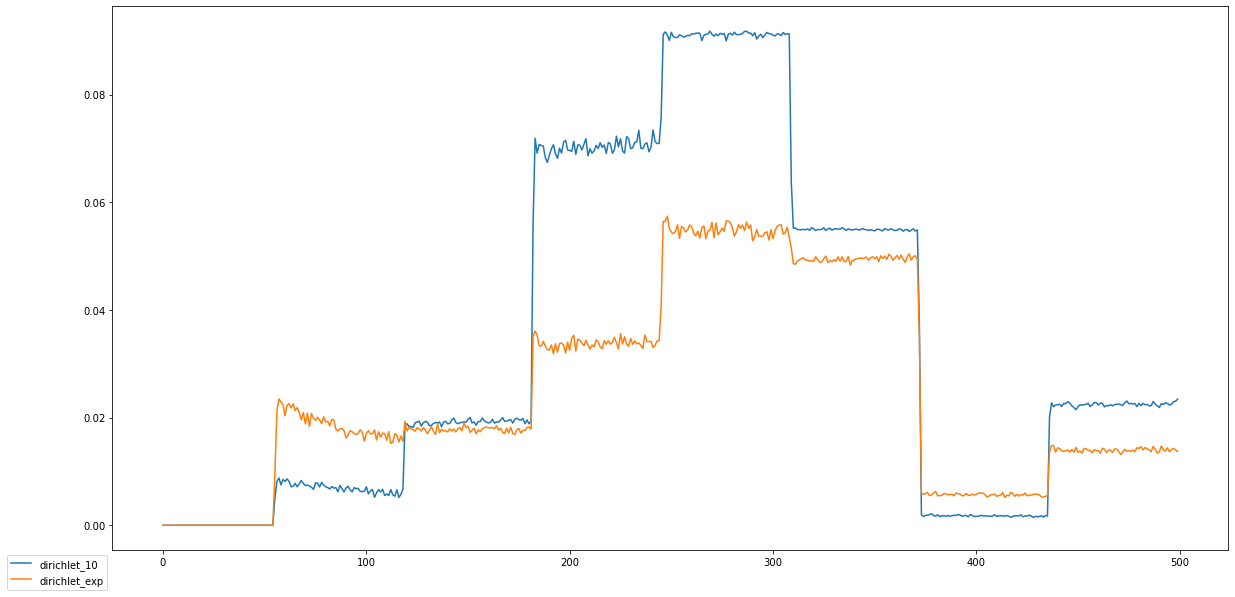

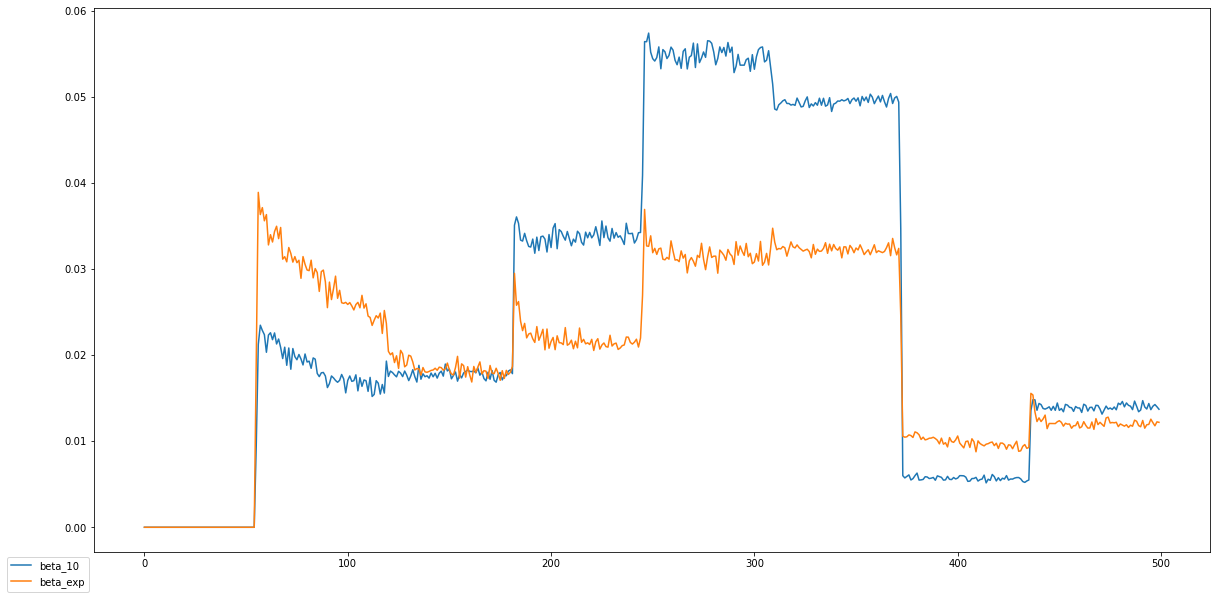

In [3]:
for ctr in collection:
    beta_10 = evaluate(BetaThompsonSampling,
                     ctr,
                     experiments = 10,
                     cluster_decay_size = 10,
                     iterations = 100000,
                     topk = 3)

    beta_exp = evaluate(BetaThompsonSampling,
                     ctr,
                     experiments = 10,
                     cluster_decay_size = np.exp(1),
                     iterations = 100000,
                     topk = 3)

    dirichlet_10 = evaluate(DirichletThompsonSampling,
                     ctr,
                     experiments = 10,
                     cluster_decay_size = 10,
                     iterations = 100000,
                     topk = 3)

    dirichlet_exp = evaluate(DirichletThompsonSampling,
                     ctr,
                     experiments = 10,
                     cluster_decay_size = np.exp(1),
                     iterations = 100000,
                     topk = 3)
    
    barplot(ctr)
    draw_regret({'dirichlet_10' : dirichlet_10, 'beta_10' : dirichlet_exp},
           n_groups = 500)

    draw_regret({'dirichlet_exp' : dirichlet_exp, 'beta_exp' : beta_exp},
               n_groups = 500)

    draw_regret({'dirichlet_10' : dirichlet_10, 'beta_exp' : beta_exp},
               n_groups = 500)
    
    draw_regret({'dirichlet_10' : dirichlet_10, 'dirichlet_exp' : dirichlet_exp},
           n_groups = 500)

    draw_regret({'beta_10' : dirichlet_exp, 'beta_exp' : beta_exp},
               n_groups = 500)